# Analysis of exports and imports of sheep and goats in Ireland.

In [1]:
import pandas as pd
import statistics as stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

from scipy import stats
import numpy as np  
import scipy as sp

# EXPORT 2021




In [2]:
df = pd.read_csv('ANUAL_EXPORT.gz')
df.head(10)

,DATAFLOW,LAST UPDATE,freq,reporter,partner,product,flow,indicators,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:DS-045409(1.0),15/11/22 11:00:00,A,FR,IE,104,2,VALUE_IN_EUROS,2021,11333,NaN
1,ESTAT:DS-045409(1.0),15/11/22 11:00:00,A,NL,IE,104,2,VALUE_IN_EUROS,2021,37068,NaN


In [3]:
df.shape

(2, 11)

In [4]:
df.sort_values(by='OBS_VALUE', ascending=False, inplace=True, ignore_index=True)

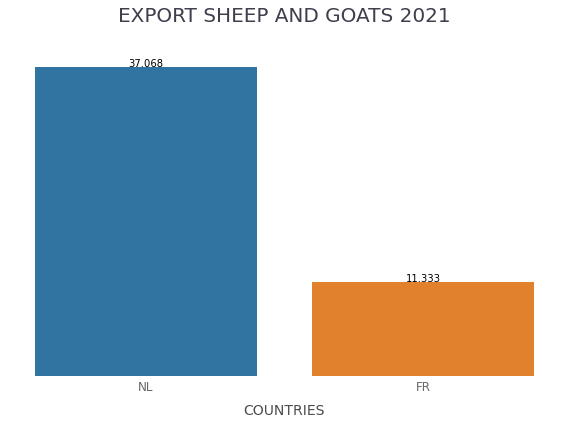

In [5]:
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(x='reporter', y='OBS_VALUE', data = df, ax=ax) 

ax.set_frame_on(False)
ax.set_title('EXPORT SHEEP AND GOATS 2021', loc='center', pad=30, fontdict={'fontsize':20}, 
             color='#3f3f4e') 

ax.get_yaxis().set_visible(False)
ax.tick_params(axis='x', length=0, labelsize=12, colors='dimgrey')
ax.set_xlabel('COUNTRIES', labelpad=10, fontdict={'fontsize':14}, color='#4c4c4c') 

plt.tight_layout();

for retangulo in ax.patches:
  ax.text(retangulo.get_x() + retangulo.get_width() / 2,
          retangulo.get_height() + 22,
          '{:,}'.format(int(retangulo.get_height())).replace(',','.'), ha = 'center')

In [8]:
def get_trade(state, flow):
    filename = f'trade_{flow}_{state}.zip'
    if os.path.exists(filename) == False:
        df = pd.read_json(f'https://ec.europa.eu/agrifood/api/taxud/weeklyData/{flow}?memberStateCodes={state}&sectors=Sheep')
        df.to_csv(filename, index=False,compression='zip')
        print(f"Data from API save as {filename}")
    else:
        df = pd.read_csv(filename)
        print(f"The file {filename} was read.")
    
    return df

In [9]:
trade_export = get_trade('IE', 'export')
trade_export.sample(3)

The file trade_export_IE.zip was read.


,sector,marketingYear,marketingWeek,memberStateCode,memberStateName,partnerCode,partner,product,cn8ProductCode,taric10ProductCode,procedure,preference,euroValue,unitValue,kg,kgEquivalent,coefficient
3077,Sheep,2020,23,IE,Ireland,CH,Switzerland,Frozen Meat,2044290,204429000,10,0,25726,8.30,3100,3100,1.0
1125,Sheep,2022,8,IE,Ireland,GB,United Kingdom,Preparations,16029091,1602909100,10,0,111287,6.71,16576,16576,1.0
2515,Sheep,2021,8,IE,Ireland,GB,United Kingdom,Offals,2068099,206809900,10,0,10156,1.17,8700,8700,1.0


In [10]:
print(trade_export['partner'].unique())
trade_export.head(2)

['United Kingdom' 'Ivory Coast' 'Canada' 'Singapore' 'Philippines'
 'Switzerland' 'United Arab Emirates' 'Japan' 'Ghana'
 'Trinidad and Tobago' 'Hong Kong' 'United States of America'
 'New Zealand' 'China' 'Qatar' 'Libya'
 'Countries and territories not specified' 'Kuwait' 'South Africa'
 'European Union' 'Cape Verde' 'Australia' 'Vietnam' 'Congo' 'Uganda'
 'Central African Republic' 'Tanzania' 'Ukraine' 'Comoros' 'Gabon'
 'Albania' 'Turkey' 'Liberia' 'Taiwan' 'Norway' 'India' 'Maldives'
 'Lebanon' 'Tunisia' 'Bahrain']


,sector,marketingYear,marketingWeek,memberStateCode,memberStateName,partnerCode,partner,product,cn8ProductCode,taric10ProductCode,procedure,preference,euroValue,unitValue,kg,kgEquivalent,coefficient
0,Sheep,2022,52,IE,Ireland,GB,United Kingdom,Fresh meat,2042300,204230000,10,0,15051,11.87,1268,2295,1.81
1,Sheep,2022,52,IE,Ireland,GB,United Kingdom,Fresh meat,2042230,204223000,10,0,9091,3.59,2532,2532,1.00


# IMPORT 2021

In [11]:
df2 = pd.read_csv('ANUAL_IMPORT.gz')
df2.head()

,DATAFLOW,LAST UPDATE,freq,reporter,partner,product,flow,indicators,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:DS-045409(1.0),15/11/22 11:00:00,A,DE,IE,104,1,VALUE_IN_EUROS,2021,43450,NaN
1,ESTAT:DS-045409(1.0),15/11/22 11:00:00,A,FR,IE,104,1,VALUE_IN_EUROS,2021,1382429,NaN
2,ESTAT:DS-045409(1.0),15/11/22 11:00:00,A,IT,IE,104,1,VALUE_IN_EUROS,2021,910309,NaN
3,ESTAT:DS-045409(1.0),15/11/22 11:00:00,A,NL,IE,104,1,VALUE_IN_EUROS,2021,822,NaN


In [12]:
df2.shape

(4, 11)

In [13]:
df2.sort_values(by='OBS_VALUE', ascending=False, inplace=True, ignore_index=True)

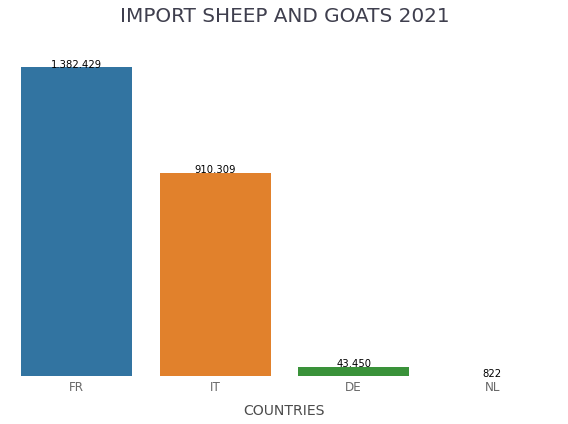

In [14]:
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(x='reporter', y='OBS_VALUE', data = df2, ax=ax) 

ax.set_frame_on(False)
ax.set_title('IMPORT SHEEP AND GOATS 2021', loc='center', pad=30, fontdict={'fontsize':20}, 
             color='#3f3f4e') 

ax.get_yaxis().set_visible(False)
ax.tick_params(axis='x', length=0, labelsize=12, colors='dimgrey')
ax.set_xlabel('COUNTRIES', labelpad=10, fontdict={'fontsize':14}, color='#4c4c4c') 

plt.tight_layout();

for retangulo in ax.patches:
  ax.text(retangulo.get_x() + retangulo.get_width() / 2,
          retangulo.get_height() + 22,
          '{:,}'.format(int(retangulo.get_height())).replace(',','.'), ha = 'center')

In [15]:
trade_import = get_trade('IE','import')
print(trade_import['partner'].unique())
trade_import.head(2)

The file trade_import_IE.zip was read.
['United Kingdom' 'European Union' 'Australia' 'New Zealand' 'Norway'
 'United States of America' 'Turkey' 'Iceland']


,sector,marketingYear,marketingWeek,memberStateCode,memberStateName,partnerCode,partner,product,cn8ProductCode,taric10ProductCode,procedure,preference,euroValue,unitValue,kg,kgEquivalent,coefficient
0,Sheep,2022,52,IE,Ireland,GB,United Kingdom,Preparations,16029091,1602909100,4000,100,233,6.94,34,34,1.0
1,Sheep,2022,52,IE,Ireland,GB,United Kingdom,Fresh meat,2041000,204100010,4000,300,286512,6.83,41966,41966,1.0


# PRICE

In [16]:
# getting price by API if the file isn't avaible
def get_prices(state):
    filename = f'price_{state}.zip'
    if os.path.exists(filename) == False:
        df = pd.read_json(f'https://ec.europa.eu/agrifood/api/sheepAndGoat/prices?memberStateCodes={state}')
        df.to_csv(filename, index=False,compression='zip')
        print(f"Data from API save as {filename}")
    else:
        df = pd.read_csv(filename)
        print(f"The file {filename} was read.")
    
    return df

In [17]:
price_IE = get_prices('IE')
price_IE.sample(3)

The file price_IE.zip was read.


,memberStateCode,memberStateName,beginDate,endDate,weekNumber,price,unit,category,marketName,marketingYear
282,IE,Ireland,10/07/2017,16/07/2017,28,€504.63,100CARC,Heavy Lamb,IE,2017
161,IE,Ireland,04/11/2019,10/11/2019,45,€413.40,100CARC,Heavy Lamb,IE,2019
398,IE,Ireland,20/04/2015,26/04/2015,17,€512.81,100CARC,Heavy Lamb,IE,2015


In [51]:
price_FR.unit.unique()

array(['100CARC'], dtype=object)

In [19]:
price_FR = get_prices('FR')
price_FR.head(10)

The file price_FR.zip was read.


,memberStateCode,memberStateName,beginDate,endDate,weekNumber,price,unit,category,marketName,marketingYear
0,FR,France,12/12/2022,18/12/2022,50,€857.00,100CARC,Heavy Lamb,FR,2022
1,FR,France,05/12/2022,11/12/2022,49,€851.00,100CARC,Heavy Lamb,FR,2022
2,FR,France,28/11/2022,04/12/2022,48,€852.00,100CARC,Heavy Lamb,FR,2022
3,FR,France,21/11/2022,27/11/2022,47,€836.00,100CARC,Heavy Lamb,FR,2022
4,FR,France,14/11/2022,20/11/2022,46,€829.00,100CARC,Heavy Lamb,FR,2022
5,FR,France,07/11/2022,13/11/2022,45,€815.00,100CARC,Heavy Lamb,FR,2022
6,FR,France,31/10/2022,06/11/2022,44,€804.00,100CARC,Heavy Lamb,FR,2022
7,FR,France,24/10/2022,30/10/2022,43,€800.00,100CARC,Heavy Lamb,FR,2022
8,FR,France,17/10/2022,23/10/2022,42,€796.00,100CARC,Heavy Lamb,FR,2022
9,FR,France,10/10/2022,16/10/2022,41,€795.00,100CARC,Heavy Lamb,FR,2022


In [71]:
prices = pd.concat([price_IE,price_FR], keys=['IRELAND', 'FRANCE'])
prices['price'] = (prices['price'].apply(lambda x: re.sub('\D', '', x)).astype('float')/100)
prices.sample(10)

memberStateCode memberStateName   beginDate     endDate  \
PORTUGAL 14               PT        Portugal  24/10/2022  30/10/2022   
IRELAND  42               IE         Ireland  14/02/2022  20/02/2022   
FRANCE   243              FR          France  16/04/2018  22/04/2018   
IRELAND  10               IE         Ireland  26/09/2022  02/10/2022   
FRANCE   270              FR          France  09/10/2017  15/10/2017   
         413              FR          France  12/01/2015  18/01/2015   
         148              FR          France  10/02/2020  16/02/2020   
PORTUGAL 612              PT        Portugal  12/01/2015  18/01/2015   
         554              PT        Portugal  22/02/2016  28/02/2016   
IRELAND  84               IE         Ireland  26/04/2021  02/05/2021   

              weekNumber   price     unit    category marketName  \
PORTUGAL 14           43  909.94  100CARC  Light Lamb         PT   
IRELAND  42            7  671.99  100CARC  Heavy Lamb         IE   
FRANCE   243          16  637.00  100CARC  Heavy Lamb         FR   
IRELAND  10           39  614.29  100CARC  Heavy Lamb         IE   
FRANCE   270          41  642.00  100CARC  Heavy Lamb         FR   
         413           3  672.00  100CARC  Heavy Lamb         FR   
         148           7  642.00  100CARC  Heavy Lamb         FR   
PORTUGAL 612           3  518.00  100CARC  Light Lamb         PT   
         554           8  464.00  100CARC  Light Lamb         PT   
IRELAND  84           17  730.66  100CARC  Heavy Lamb         IE   

              marketingYear  
PORTUGAL 14            2022  
IRELAND  42            2022  
FRANCE   243           2018  
IRELAND  10            2022  
FRANCE   270           2017  
         413           2015  
         148           2020  
PORTUGAL 612           2015  
         554           2016  
IRELAND  84            2021

In [66]:
def graf_his(dataframe, a, b, year):

    df = dataframe[dataframe["marketingYear"] == year] #getting year
    price_a = df[df['memberStateName']== a]['price'].values #list
    price_b = df[df['memberStateName']== b]['price'].values #list


    print(f'qtd. {a}: ', price_a.shape[0])
    print(f'qtd. {b}: ', price_b.shape[0])

    print(f'média dos preços {a}: ', np.mean(price_a))
    print(f'média dos preços {b}: ', np.mean(price_b))

    ##Visualizando as distribuições
    fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 4))

    ax0.hist(price_a);
    ax0.set_title(f'Preços 100CARC {a} ({year})');

    ax1.hist(price_b);
    ax1.set_title(f'Preços 100CARC {b} ({year})');

qtd. Ireland:  53
qtd. France:  53
média dos preços Ireland:  517.7201886792453
média dos preços France:  673.811320754717


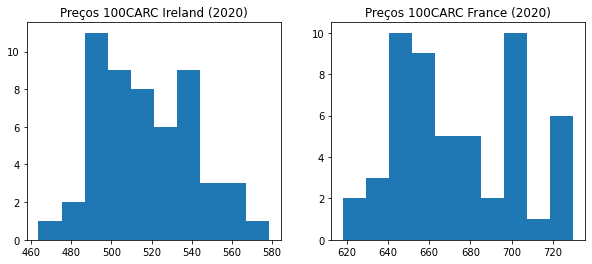

In [73]:
graf_his(prices, 'Ireland', 'France', 2020)